/var/folders/38/9t7bbt_x1b90vs1k_t_qnj6w0000gp/T/ipykernel_99614/4092158155.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis", ax=axes[1, 0])
/var/folders/38/9t7bbt_x1b90vs1k_t_qnj6w0000gp/T/ipykernel_99614/4092158155.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_feedback.values, y=top_feedback.index, palette="magma", ax=axes[1, 1])


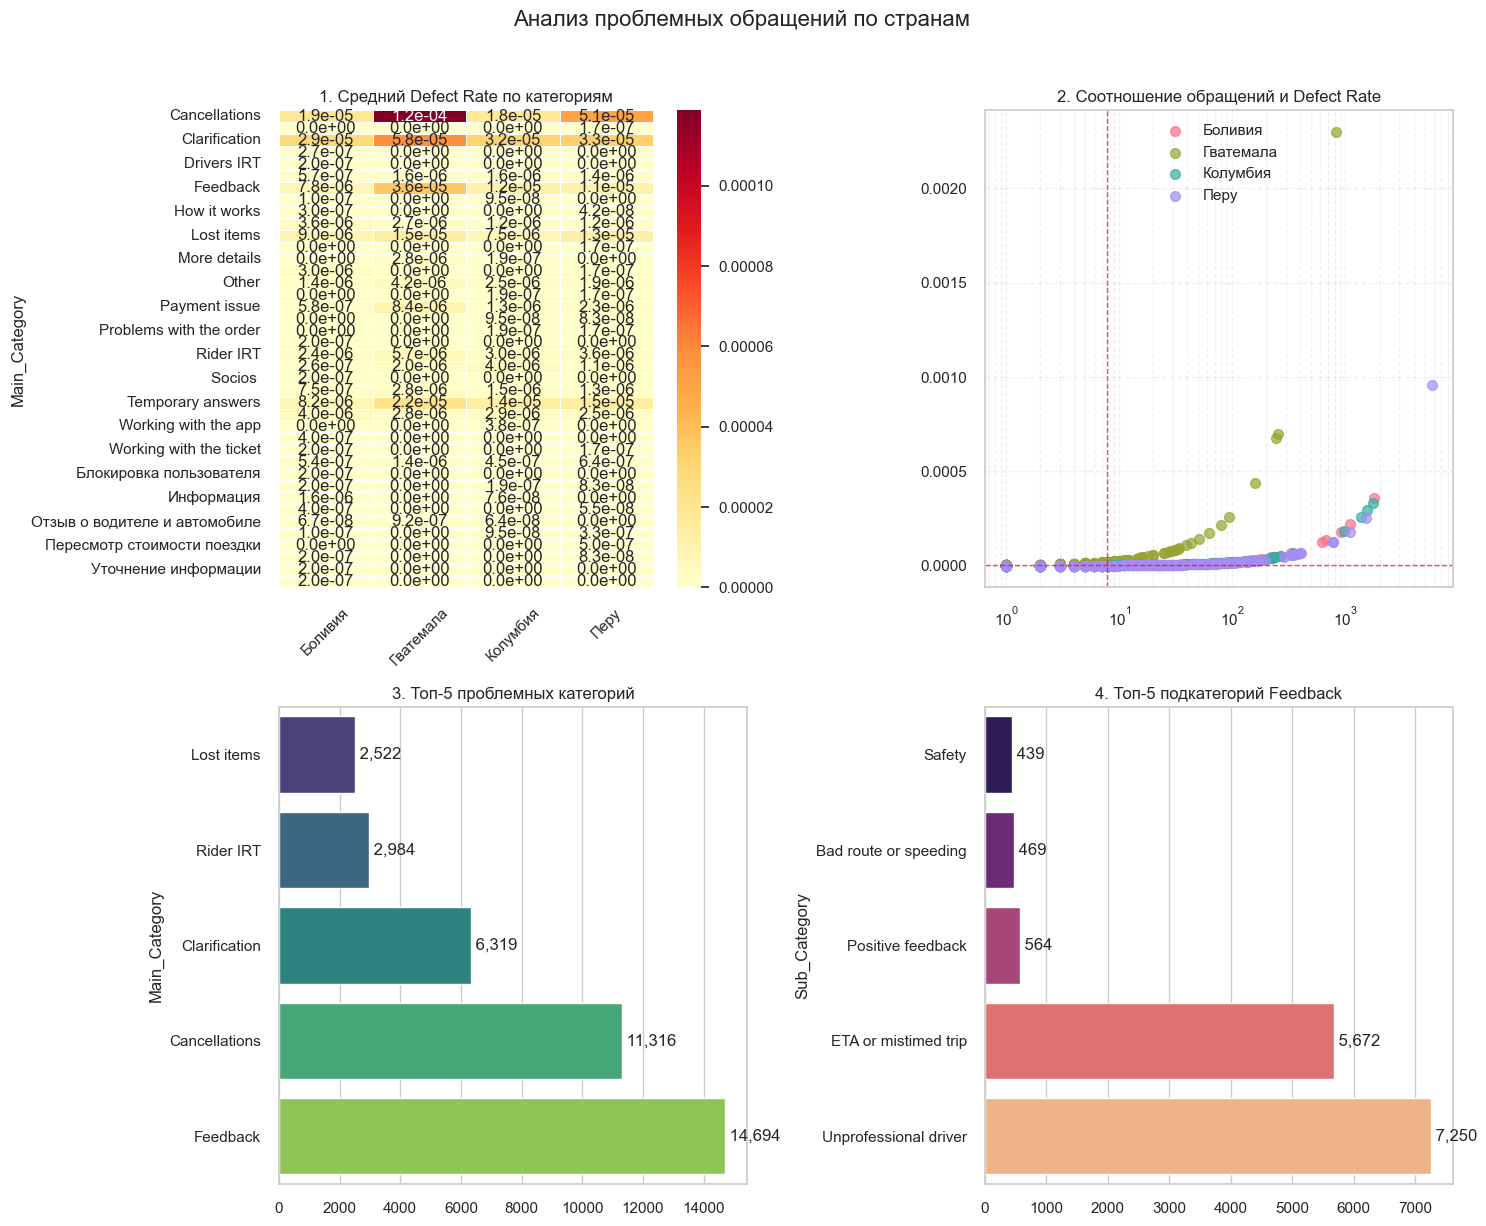

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Настройки и загрузка данных
plt.style.use('seaborn-v0_8')
sns.set_theme(style="whitegrid", palette="husl")
df = pd.read_excel("data for analysis.xlsx", sheet_name="Chart data").fillna(0)
countries = ['Боливия | Bolivia', 'Гватемала | Guatemala', 'Колумбия | Colombia', 'Перу | Peru']

# 2. Подготовка данных
df['Main_Category'] = df['theme_name'].str.split('::').str[0]
df['Sub_Category'] = df['theme_name'].str.split('::').str[1]
request_columns = [f"{country} - request" for country in countries]
df['Total_Requests'] = df[request_columns].sum(axis=1)

# 3. Создаем фигуру с 4 субплoтами
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Анализ проблемных обращений по странам', y=1.02, fontsize=16)

# График 1: Heatmap Defect Rate
heatmap_data = pd.DataFrame()
for country in countries:
    country_name = country.split('|')[0].strip()
    heatmap_data[country_name] = df.groupby('Main_Category')[f"{country} - Defect Rate"].mean()

sns.heatmap(heatmap_data, cmap="YlOrRd", annot=True, fmt=".1e", linewidths=.5, ax=axes[0, 0])
axes[0, 0].set_title('1. Средний Defect Rate по категориям')
axes[0, 0].tick_params(axis='x', rotation=45)

# График 2: Scatter plot
colors = sns.color_palette("husl", len(countries))
for i, country in enumerate(countries):
    country_name = country.split('|')[0].strip()
    subset = df[(df[f"{country} - request"] > 0) & (df[f"{country} - Defect Rate"] > 0)]
    axes[0, 1].scatter(subset[f"{country} - request"], subset[f"{country} - Defect Rate"],
                      color=colors[i], label=country_name, s=50, alpha=0.7)

req_75 = df[request_columns].quantile(0.75).mean()
dr_75 = df[[f"{c} - Defect Rate" for c in countries]].quantile(0.75).mean()
axes[0, 1].axhline(dr_75, color='red', linestyle='--', alpha=0.7, linewidth=1)
axes[0, 1].axvline(req_75, color='red', linestyle='--', alpha=0.7, linewidth=1)
axes[0, 1].set_xscale('log')
axes[0, 1].set_title('2. Соотношение обращений и Defect Rate')
axes[0, 1].legend()
axes[0, 1].grid(True, which="both", ls="--", alpha=0.3)

# График 3: Топ-5 проблем
top_categories = df.groupby('Main_Category')['Total_Requests'].sum().nlargest(5).sort_values()
sns.barplot(x=top_categories.values, y=top_categories.index, palette="viridis", ax=axes[1, 0])
axes[1, 0].set_title('3. Топ-5 проблемных категорий')
for i, v in enumerate(top_categories):
    axes[1, 0].text(v, i, f' {v:,.0f}', va='center')

# График 4: Детализация Feedback
feedback_data = df[df['Main_Category'] == 'Feedback']
top_feedback = feedback_data.groupby('Sub_Category')['Total_Requests'].sum().nlargest(5).sort_values()
sns.barplot(x=top_feedback.values, y=top_feedback.index, palette="magma", ax=axes[1, 1])
axes[1, 1].set_title('4. Топ-5 подкатегорий Feedback')
for i, v in enumerate(top_feedback):
    axes[1, 1].text(v, i, f' {v:,.0f}', va='center')

# Общие настройки
plt.tight_layout()
plt.show()